In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
underSampler = RandomUnderSampler(random_state=78,replacement=False)

# bank Data

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:


df["HasCrCard"] = df.HasCrCard.astype('bool')
df["IsActiveMember"] = df.IsActiveMember.astype('bool')

df["Exited"] = df.Exited.astype('bool')

In [5]:
del df["Surname"]

In [6]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,True,True,101348.88,True
1,15647311,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False
2,15619304,502,France,Female,42,8,159660.80,3,True,False,113931.57,True
3,15701354,699,France,Female,39,1,0.00,2,False,False,93826.63,False
4,15737888,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False


In [7]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df['Exited'].value_counts()

False    7963
True     2037
Name: Exited, dtype: int64

In [9]:
bank_x = df.loc[:, df.columns != 'Exited']

bank_y = df["Exited"]

bank_x_under, bank_y_under = underSampler.fit_resample(bank_x, bank_y)

df = bank_x_under

df["Exited"] = bank_y_under

df['Exited'].value_counts()



False    2037
True     2037
Name: Exited, dtype: int64

In [10]:
triples = []

for _, row in df.iterrows():
    
    credit = (row["CustomerId"], "hasCreditScoreOf", row["CreditScore"])
    gender = (row["CustomerId"], "hasGender", row["Gender"])
    age = (row["CustomerId"], "isAge", row["Age"])
    
    country = (row["CustomerId"], "inCountry", row["Geography"])
    bal = (row["CustomerId"], "hasBalance", row["Balance"])
    
    prods = (row["CustomerId"], "hasNumberOfProducts", row["NumOfProducts"])
    
    card = (row["CustomerId"], "hasCreditCard", row["HasCrCard"])
    active = (row["CustomerId"], "IsActiveMember", row["IsActiveMember"])
    churn = (row["CustomerId"], "hasChurned", row["Exited"])
    
    tenure = (row["CustomerId"], "TenureOf", row["Tenure"])
    
    salary = (row["CustomerId"], "hasEstimatedSalaryOf", row["EstimatedSalary"])
    
    
    triples.extend((credit, gender,age, country,bal,prods,card,active,churn,tenure, salary))
    
    

In [11]:
triples_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])

In [12]:
triples_df[(triples_df.subject==15634602)]

,subject,predicate,object
22407,15634602,hasCreditScoreOf,619
22408,15634602,hasGender,Female
22409,15634602,isAge,42
22410,15634602,inCountry,France
22411,15634602,hasBalance,0.0
22412,15634602,hasNumberOfProducts,1
22413,15634602,hasCreditCard,True
22414,15634602,IsActiveMember,True
22415,15634602,hasChurned,True
22416,15634602,TenureOf,2


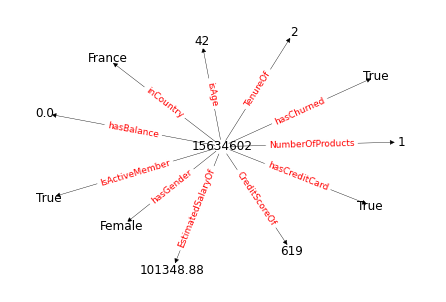

<Figure size 432x288 with 0 Axes>

In [13]:
bankGraph = nx.DiGraph()

bankGraph.add_edges_from([("15634602","619"),
                          ("15634602","Female"),
                         ("15634602","42"),
                         ("15634602","France"),
                         ("15634602","0.0"),
                         ("15634602","1"),
                         ("15634602","True  "),
                         ("15634602","True "),
                         ("15634602","True"),
                         ("15634602","2"),
                         ("15634602","101348.88")]
                         )





pos = nx.spring_layout(bankGraph)
plt.figure()    
nx.draw(bankGraph,pos,edge_color='black',width=0.4,linewidths=0.5,\
node_size=200,node_color='white',alpha=1,\
labels={node:node for node in bankGraph.nodes()})
nx.draw_networkx_edge_labels(bankGraph,pos,font_size = 9,edge_labels={
    ("15634602","619"):'CreditScoreOf',
    ("15634602","Female"):'hasGender',
    ("15634602","42"):'isAge',
    ("15634602","France"):'inCountry',
    ("15634602","0.0"):'hasBalance',
    ("15634602","1"):'NumberOfProducts',
    ("15634602","True  "):"hasCreditCard",
    ("15634602","True "):"hasChurned",
    ("15634602","True"):"IsActiveMember",
    ("15634602","2"):'TenureOf',
    ("15634602","101348.88"):'EstimatedSalaryOf'},
    font_color='red')
plt.axis('off')
plt.show()
plt.draw()

In [14]:
triples_df.to_csv("BankTriples.csv")

df.to_csv("bank_prepped.csv")

# Telco Data

In [15]:
df = pd.read_csv("Telco_customer_churn.csv")

In [16]:
df.head()

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [17]:


df["Churn Value"] = df["Churn Value"].astype('bool')


                          

In [18]:
df = df.replace({'No': False, 'Yes': True})

In [19]:
df['Churn Value'].value_counts()

False    5174
True     1869
Name: Churn Value, dtype: int64

In [20]:
telco_x = df.loc[:, df.columns != 'Churn Value']

telco_y = df["Churn Value"]

telco_x_under, telco_y_under = underSampler.fit_resample(telco_x, telco_y)

df = telco_x_under

df["Churn Value"] = telco_y_under

df['Churn Value'].value_counts()

False    1869
True     1869
Name: Churn Value, dtype: int64

In [21]:
triples = []

for _, row in df.iterrows():
    
    zipcode = (row["CustomerID"],"hasZipCode", row["Zip Code"])
    gender = (row["CustomerID"], "hasGender", row["Gender"])
    
    lat = (row["CustomerID"], "hasLatitude", row["Latitude"])
    long = (row["CustomerID"], "hasLongitude", row["Longitude"])
    
    #city = (row["CustomerID"], "inCity", row["City"])
    
    senior = (row["CustomerID"], "SeniorCitizen", row["Senior Citizen"])
    partner = (row["CustomerID"], "hasPartner", row["Partner"])
    
    kids = (row["CustomerID"], "hasDependents", row["Dependents"])
    
    Tenure = (row["CustomerID"], "hasTenure", row["Tenure Months"])
    
    phone = (row["CustomerID"], "hasPhoneService", row["Phone Service"])
    lines = (row["CustomerID"], "hasMultipleLines", row["Multiple Lines"])
    
    internet = (row["CustomerID"], "hasInternetService", row["Internet Service"])
    
    security = (row["CustomerID"], "hasOnlineSecurity", row["Online Security"])
    backup = (row["CustomerID"], "hasOnlineBackup", row["Online Backup"])
    
    protection = (row["CustomerID"], "hasDeviceProtection", row["Device Protection"])
    support =  (row["CustomerID"], "hasTechSupport", row["Tech Support"])
    
    streamingTv = (row["CustomerID"], "hasStreamingTV", row["Streaming TV"])
    streamingMovies = (row["CustomerID"], "hasStreamingMovies", row["Streaming Movies"])
    
    contract = (row["CustomerID"], "hasContractType", row["Contract"])
    paperbill = (row["CustomerID"], "hasPaperlessBilling", row["Paperless Billing"])
    
    payMethod = (row["CustomerID"], "usesPaymentMethod", row["Payment Method"])
    monthly = (row["CustomerID"], "hasMonthlyCharges", row["Monthly Charges"])
    
    total = (row["CustomerID"], "totalCharges", row["Total Charges"])
    
    churn = (row["CustomerID"], "hasChurned", row["Churn Value"])
    
    triples.extend((zipcode,churn,total,monthly,payMethod,paperbill,contract,streamingMovies,streamingTv, support,
                   protection,backup,security, internet,lines,phone,Tenure,kids,partner, senior,long,lat,
                   gender))
    
telco_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])

In [22]:
telco_df[(telco_df.subject=="7892-POOKP")]

,subject,predicate,object
43056,7892-POOKP,hasZipCode,90010
43057,7892-POOKP,hasChurned,True
43058,7892-POOKP,totalCharges,3046.05
43059,7892-POOKP,hasMonthlyCharges,104.8
43060,7892-POOKP,usesPaymentMethod,Electronic check
43061,7892-POOKP,hasPaperlessBilling,True
43062,7892-POOKP,hasContractType,Month-to-month
43063,7892-POOKP,hasStreamingMovies,True
43064,7892-POOKP,hasStreamingTV,True
43065,7892-POOKP,hasTechSupport,True


In [23]:
telco_df.to_csv("TelcoTriples.csv")

df.to_csv("Telco_prepped.csv")

In [24]:
print(len(telco_df))
print(len(triples_df))

85974
44814


In [25]:
print(len(np.unique(telco_df["predicate"])))
print(len(np.unique(triples_df["predicate"])))

23
11


In [26]:

telcoEnties = pd.concat([telco_df["object"],telco_df["subject"]]).tolist()

numEnts = len(np.unique(telcoEnties))
print(numEnts)
type(telcoEnties)

12987


list

In [27]:
bankEnties = pd.concat([triples_df["object"],triples_df["subject"]]).tolist()

numEnts = len(np.unique(bankEnties))
print(numEnts)

11455


In [28]:
np.shape(telco_df)

(85974, 3)

In [29]:
np.shape(df)

(3738, 25)

In [30]:
dimTriple = 169032 * 3
dimNorm = 7043 * 25

dimTriple - dimNorm


331021